# Predicting Boston Housing Prices
## Model Evaluation & Validation

## Getting Started
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project.

In [9]:
# Import libraries necessary for this project
import sys
!{sys.executable} -m pip install numpy pandas matplotlib sklearn scipy   #Imports Python2 versions of numpy, matplotlib, pandas, sci-kit learn into jupyter for use with Python2 kernel
import numpy as np
import pandas as pd
#from sklearn.cross_validation import ShuffleSplit   #Deprecated  -- Note this should be updated for the Udacity ML Nanodegree
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


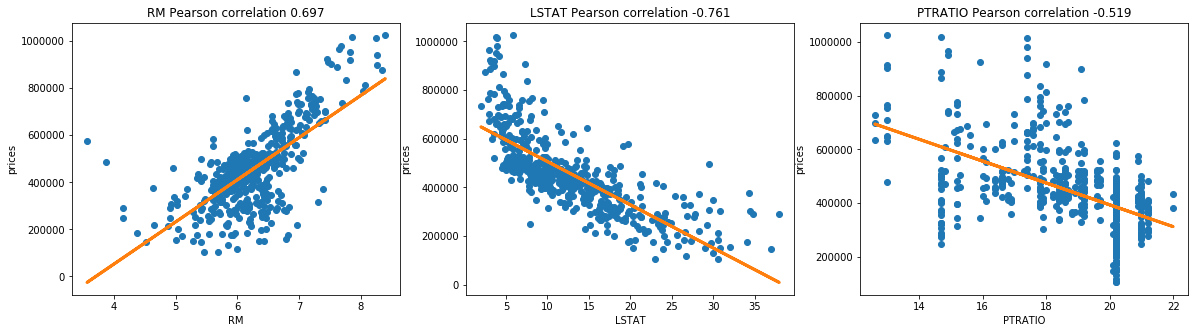

In [10]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], prices, 'o')
    fit = np.polyfit(data[col], prices, 1)
    plt.plot(data[col], data[col] * fit[0] + fit[1], lw=3)
    plt.title(col + ' Pearson correlation ' + str(np.round(np.corrcoef(data[col], prices)[1][0], 3)))
    plt.xlabel(col)
    plt.ylabel('prices')


# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

### Notes
- I would expect a home with an 'RM' value of 6 would be worth LESS than one with an 'RM' value of 7 because an extra room would likely indicate more square-footage, which would represent a higher dollar value.

- I would expect that a neighborhood with an 'LSTAT' value of 15 would have HIGHER home prices than one with an 'LSTAT' score of 20. Since lower class workers would likely not be able to afford higher priced homes, one might assume that a lower ratio of lower income workers in a neighborhood would indicate at least the possibility of higher priced homes.

- I would expect that a neighborhod with a 'PTRATIO' of 10 would have HIGHER homes prices than one with a 'PTRATIO' of 15 because one would expect student attending schools with smaller class sizes would live in more affluent neighborhoods where parents could afford to send their kids to higher quality schools (and one might also assume that house prices in more affluent neighborhoods would be higher because people could afford to buy nicer houses).

----

## Developing a Model

### Implementation: Define a Performance Metric
For this project, I will be calculating the *coefficient of determination*, R<sup>2</sup>, to quantify my model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

In [22]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    #y_true_mean = np.mean(y_true)
    #SSres = sum(np.square(np.subtract(y_true, y_predict)))
    #SStot = sum(np.square(np.subtract(y_true, y_true_mean)))
    #score = 1.0 - SSres/SStot
    
    # Return the score
    return score

### Implementation: Shuffle and Split Data

In [13]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split   #NOTE sklearn.cross_validation is deprecated -- make sure to update this in the course material

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Notes

Splitting a dataset into some ratio of training and testing subsets allows us to insure that we are able to pick the best model and fit (the most optimal model) before testing its predictive value. However, in order to do that we need to make sure that we don't bias the model by training it on the data that we wish to use for measuring its predictive value, otherwise it may overfit the data and not generalize well on predictions beyond the data for which it was trained. 

Kind of like if a kid studied for a test by memorizing the answers to his homework, but then the test had different questions.

----

## Analyzing Model Performance

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.

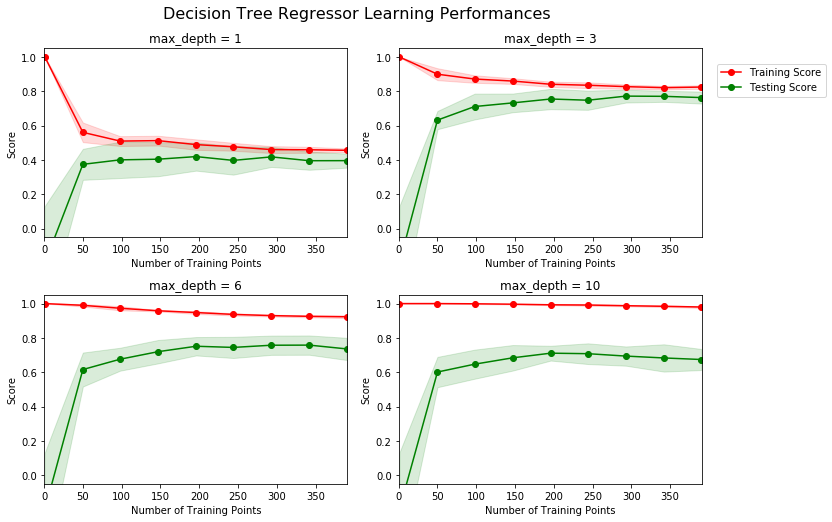

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Notes 

Graph 2 (max_depth=3)
- As more training points are added the score of the training curve goes down slightly until it converges around 0.8 R^2. Conversely the testing curve score improves as more points are added until it converges around 0.77 R^2. This is good because it indicates that the training model is not underfitting the model because the R^2 is relatively high, but it's also not overfitting because both the learning and test curves converge to around the same score.
- If we look at the testing curve (for all max depths), we can clearly see that it has converged to its optimal score, so more data is not necessary in any of these. If there were a larger gap between the training and testing curves we might consider adding more data points, but in practice collecting more data can often be time consuming and/or expensive, so it's better if we can avoid having to collect more data.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

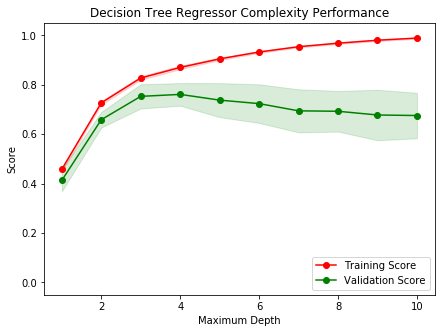

In [15]:
vs.ModelComplexity(X_train, y_train)

### Notes 

- When the model is trained with a maximum depth of 1 it suffers from high bias because the training and testing curves converge to a low R^2 score, indicating that the model is underfitting the data. 

- When the model is trained with a maximum depth of 10 it suffers from high variance because the training and testing curves retain a large gap between their R^2 scores, indicating that the model is overfitting the data (ie., not generalizing well from the training data to the testing data). 

- Max depth 3 results in the best model for generalizing to unseen data.

- The main intuition is that both the training and testing curves converge to a score around .77 R^2. This is good because it indicates that the training model is not underfitting the model because the R^2 is relatively high, but it's also not overfitting because both the learning and test curves converge to around the same score.

-----

## Evaluating Model Performance

### Notes

- Grid search is the process of selecting a model by making a table with all the possible combinations of different hyperparameters (such as type of kernel, gamma value, max-depth, etc.) and then choosing the optimal combination that gives us the highest validation score based on the 'scoring function' we use. In our example we are passing 10 different values for 'max_depth' to grid search, meaning, we are asking to run the decision tree regression for each value of 'max_depth' and evaluate each iteration of the model based on our scoring function (r2_score in this project) based on our train/validation data that's produced using the ShuffleSplit method. At the end we are returned the highest scoring max depth for the validation set.

- K-fold cross-validation is the process breaking our data into k buckets, then training our model k times, each time using a different bucket as our testing set and the remaining points as our training set. Then we average the results to get a final model.

- The benefit of this technique is that we're able to use all of our training data, as opposed to setting aside a part of it as a validation set (or more specifically, leaving part of the training data idle). In other words, we run k-fold cross-validation on the training dataset to keep as much training data as possible. Utilizing more 'splits' of the training data in this way for training and validation is useful because it gives our model more training data to work with while simultaneously allowing us to do a more robust cross-validation. 

### Implementation: Fitting a Model

In [16]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV   #Deprecated

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn version 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=42)

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1,11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions

In [17]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


### Notes

Max depth is 4 for the optimal model (note that this is using sklearn 0.17). This result is slightly higher than my guess in question 6 and if one were to just look at the complexity curve graph it wouldn't be intuitive, so running the grid search really does help to optimize the hyperparameter of the model (in this case max_depth).

Here GridSearch effectively searches for the highest validation score on the different data splits in the ShuffleSplit and in this case max depth 4 was a bit higher.

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


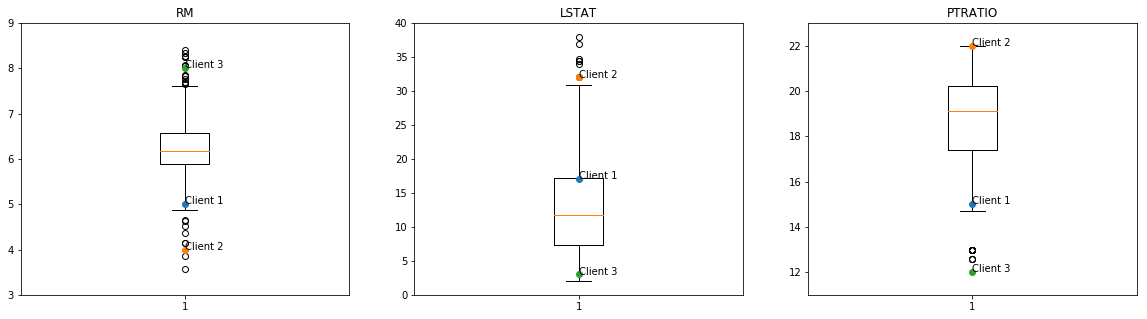

In [20]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
    
# Compute the five number summary of the descriptive stats of the features
features.describe()

# Plot feature box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
y_ax = [[3,9],[0,40],[11,23]]
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    for j in range(3):
        plt.plot(1, client_data[j][i], marker="o")
        plt.annotate('Client '+str(j+1), xy=(1,client_data[j][i]))
        plt.ylim(y_ax[i])

### Conclusion 

Statistics for Boston housing dataset:
- Minimum price: 105,000.00
- Maximum price: 1,024,800.00
- Mean price: 454,342.94
- Median price 438,900.00
- Standard deviation of prices: 165,171.13

Predicted selling price for Client 1's home is 403,025.00. This seems slightly lower than one might predict since the client's home has 5 rooms in a neighborhood with a moderate poverty rate and relatively good public schools, and it's still ~50k lower than the mean home price and 30k lower than the median. However, Client 1's RM value is almost in the lower 25 percentile of the data, and since a decrease in RM would lead to a decrease in MEDV the predicted price below the mean and median home values makes sense.

Predicted seeling price for Client 2's home is 237,478.72. This seems about right given the smaller amount of rooms in a neighborhood with relatively high poverty and not the best schools, since it is also ~215k below the mean price. Client 2's RM value is in the lower 25 percentile, while their LSTAT and PTRATIO are in the top 25 percentile, and since a decrease in RM would lead to a decrease in MEDV, and an increase in LSTAT and PTRATIO would also lead to a decrease in MEDV, the predicted price well below the mean and median makes sense.

Predicted selling price for Client 3's home is 931,636.36. This seems about right since it is situated in the most affluent neighborhood with the best schools and has almost twice as many rooms as the average house. It's price is correspondigly more than double the mean house price. Client 3's RM value is in the top 25 percentile in the data, while being near the minimum value for LSTAT and PTRATIO, and since an increase in RM would lead to an increase in MEDV, and a decrease in LSTAT and PTRATIO would also lead to an increase in MEDV, the predicted price near the maximum value in the dataset makes sense.



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

In [21]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


### Notes 

The constructed model should ot be used in a real-word setting for the following reasons:
- The data that it's trained on is old and potentially no longer representative of current housing market conditions.
- The data wouldn't take price inflation into account for the last 5 years (it only accounts for inflation 35 years following 1978)
- The features are probably not sufficient to describe a home (what about quality of appliances, sq. footage, frontage, pool/jacuzzi, crime rates, etc.)
- There's about a 30k range in price variability for prediction on any given client, which is pretty high and implies that the model isn't as robust/consistent as it could be. 
- This model probably wouldn't generalize well to area outside of Boston where the housing conditions would be very different (such as rural areas, smaller cities, etc.).
- It is somewhat fair to judge the price of an individual home based on the characteristics of the entire neighborhood, because a large part of the price is contingent on factors such as availability of good schools and the overall affluence of the community (which in turn goes toward paying for public utilities, private security, etc.). Social benefits and risks are inevitably factored into the price of the home.